# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is a field of artificial intelligence and computer science that allows as getting information from images or videos such as identifying objects, face recognization, detecting motions, etc. 

In [2]:
# Import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
print(tf.__version__)

2.12.0


## Get the data

The images we are working on are from Food 101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However this datasets modified it to only use two classes. This classes are pizza and steak.

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-06-01 09:48:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   175MB/s    in 0.6s    

2023-06-01 09:48:01 (175 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very important step at the beginning of the any machine learning project is understanding data or inspecting the data. For the computer vision this means visualizing many sample of data.

In [4]:
# List pizza_steak directory
!ls pizza_steak

test  train


In [5]:
# List train directory
!ls pizza_steak/train

pizza  steak


In [6]:
# List steak directory in the pizza directory
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

Woww. There are banch of images here.. And let's walk through pizza_steak directory and list number of files.

In [7]:
import os

# List number of files in pizza_steak
for dir in os.walk('pizza_steak'):
  print(f'There are {len(dir[1])} directories and {len(dir[2])} images in {dir[0]}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


Totally, there are 1500 images for training. 750 of them is steak and 750 of them is pizza. For the testing we have 500 images and 250 of them is for pizza and others for steak.

In [8]:
# Another way to find how many images are in a file
num_steak_images_train = os.listdir('pizza_steak/train/steak')

print(f'There are {len(num_steak_images_train)} steak images for training.')

There are 750 steak images for training.


To visualize the images, first let's get the class names programmatically.

In [9]:
# Get the classnames programmatically
import pathlib

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class names based on subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# Visualize the images
def view_random_image(target_dir, target_classes):
  
  # Setup the target directory
  target_folder = target_dir + target_classes

  # Get random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read and plot image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_classes)
  plt.axis('off')
  plt.show()

  # Show the shape of image
  print(f'Image shape: {img.shape}')

  return img

['2146963.jpg']


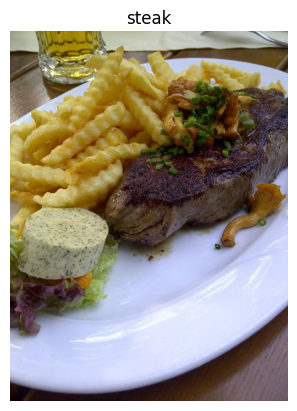

Image shape: (512, 384, 3)


In [127]:
# Let's visualize a random image in steak
random_steak = view_random_image('pizza_steak/train/', 'steak')

['2097315.jpg']


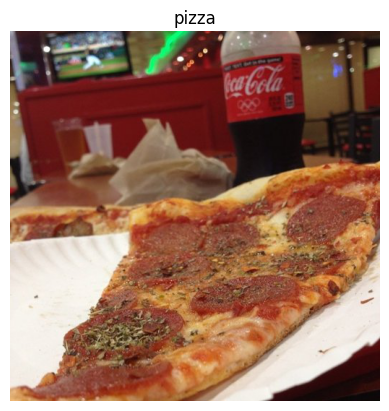

Image shape: (512, 512, 3)


In [12]:
# Let's visualize a random image in pizza
random_pizza = view_random_image('pizza_steak/train/', 'pizza')

In [13]:
# The images we plot are actually giant array or tensor of different pixel values
tf.constant(random_pizza)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 173, 184],
        [173, 175, 187],
        [172, 172, 182],
        ...,
        [ 54,  32,  19],
        [ 53,  31,  18],
        [ 53,  31,  18]],

       [[168, 172, 183],
        [170, 172, 184],
        [170, 170, 182],
        ...,
        [ 56,  34,  21],
        [ 53,  34,  20],
        [ 53,  34,  20]],

       [[165, 167, 180],
        [163, 165, 177],
        [165, 165, 177],
        ...,
        [ 53,  34,  20],
        [ 52,  33,  19],
        [ 52,  33,  19]],

       ...,

       [[235, 181, 117],
        [235, 181, 117],
        [234, 180, 116],
        ...,
        [ 14,  10,   7],
        [ 15,  11,   8],
        [ 15,  11,   8]],

       [[236, 182, 118],
        [236, 182, 118],
        [237, 183, 119],
        ...,
        [ 11,  10,   6],
        [ 11,  10,   6],
        [ 11,  10,   6]],

       [[232, 178, 114],
        [233, 179, 115],
        [235, 181, 117],
        ...,
        [  9,  10,   

In [14]:
# View the shape
random_pizza.shape # returns width, height and colour channels

(512, 512, 3)

In [15]:
# Get all pixel values between 0 and 1 (normalize the data)
tf.constant(random_pizza) / 255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.6627451 , 0.6784314 , 0.72156864],
        [0.6784314 , 0.6862745 , 0.73333335],
        [0.6745098 , 0.6745098 , 0.7137255 ],
        ...,
        [0.21176471, 0.1254902 , 0.07450981],
        [0.20784314, 0.12156863, 0.07058824],
        [0.20784314, 0.12156863, 0.07058824]],

       [[0.65882355, 0.6745098 , 0.7176471 ],
        [0.6666667 , 0.6745098 , 0.72156864],
        [0.6666667 , 0.6666667 , 0.7137255 ],
        ...,
        [0.21960784, 0.13333334, 0.08235294],
        [0.20784314, 0.13333334, 0.07843138],
        [0.20784314, 0.13333334, 0.07843138]],

       [[0.64705884, 0.654902  , 0.7058824 ],
        [0.6392157 , 0.64705884, 0.69411767],
        [0.64705884, 0.64705884, 0.69411767],
        ...,
        [0.20784314, 0.13333334, 0.07843138],
        [0.20392157, 0.12941177, 0.07450981],
        [0.20392157, 0.12941177, 0.07450981]],

       ...,

       [[0.92156863, 0.70980394, 0.45882353],
        [0.92

## An end-to-end example CNN

Let's build a convolutional neural network to find pattern in our images. Here are steps:

* Load images
* Preprocessing images
* Build a CNN model to find pattern in images
* Compile CNN
* Fit the CNN to our training data

In [16]:
# Import image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Set random seed
tf.random.set_seed(42)

# Preprocessing images (data scaling or normalization)
train_datagen = ImageDataGenerator(rescale=(1./255))
valid_datagen = ImageDataGenerator(rescale=(1./255))

# Setup path to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')    
]) 

# Compile the CNN
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 238ms/step - loss: 0.5991 - accuracy: 0.6640 - val_loss: 0.4127 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4264 - accuracy: 0.8060 - val_loss: 0.3710 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3793 - accuracy: 0.8347 - val_loss: 0.3108 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3230 - accuracy: 0.8680 - val_loss: 0.2779 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3161 - accuracy: 0.8647 - val_loss: 0.3713 - val_accuracy: 0.8460


In [19]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before not CNN

Let's replicate the model we've built in a previous section to see if it works with image data.

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 0.7971 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Hmm.. Maybe we can improve the model. Let's try adding more layer and hiddin units.

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 205ms/step - loss: 1.5284 - accuracy: 0.6433 - val_loss: 0.7243 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6305 - accuracy: 0.7273 - val_loss: 0.6522 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6185 - accuracy: 0.7227 - val_loss: 0.4857 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.5543 - accuracy: 0.7527 - val_loss: 0.4370 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4545 - accuracy: 0.8027 - val_loss: 0.4361 - val_accuracy: 0.7920


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                

Woww.. It worked but total params of model_3 is **15,093,401** while CNN's **31,101**. CNN model has less params but higher accuracy. It show us the power of CNN models.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (scaling and normalizing the model)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['443210.jpg']


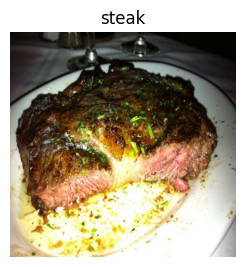

Image shape: (512, 512, 3)
['1915343.jpg']


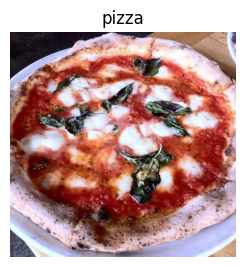

Image shape: (512, 512, 3)


In [23]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (Prepare it for model) 

In [24]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Next step is turn our data into **batches**. 

Batch is a small subset of the dataset that utilized for one iteration. Rather than look at the all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the pattern in 10,000 images in one time could result in the model not being able to learn very well.

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                               target_size=(224, 224), # target size of images
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
1500 / 32

46.875

In [30]:
# Get the first two images
images[0:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
# View the first batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In the deep learning, there are infinite amount of architectures you could create. But start with simple one and then introduce complexity as required.

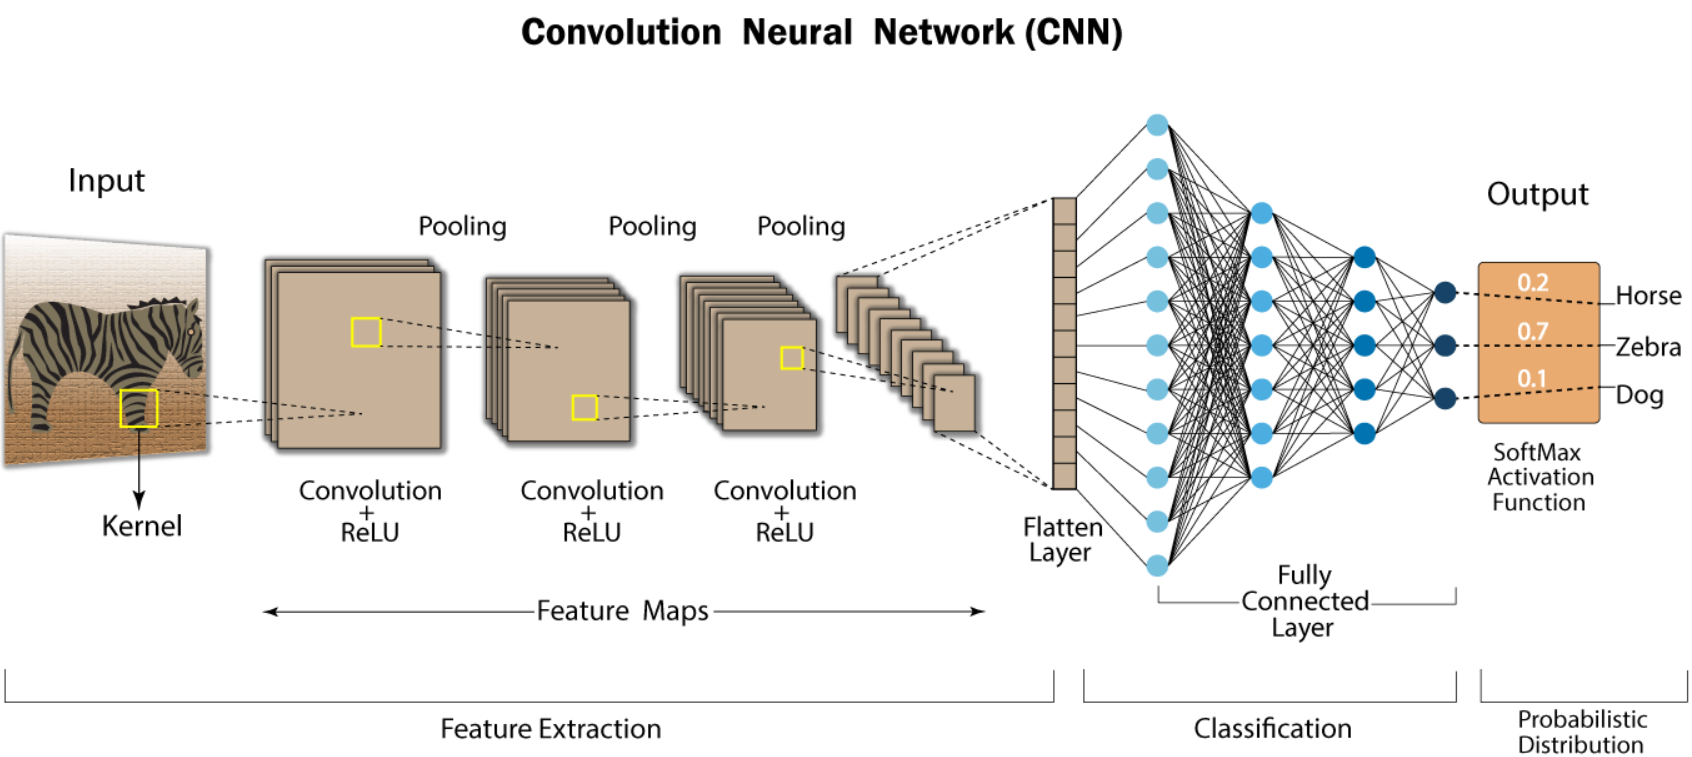

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
    kernel_size=3, # the size of the sliding window going across an input
    strides=1, # the size of step the sliding window takes across an input
    padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
    activation='relu', # 
    input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [34]:
# Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [35]:
# Get summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data) # note that this gives us total batches

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 225ms/step - loss: 0.6301 - accuracy: 0.6787 - val_loss: 0.4262 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4460 - accuracy: 0.8040 - val_loss: 0.4338 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.2959 - accuracy: 0.8893 - val_loss: 0.4080 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.1076 - accuracy: 0.9713 - val_loss: 0.4340 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.0300 - accuracy: 0.9947 - val_loss: 0.4872 - val_accuracy: 0.8260


### 5. Evaluating model

Our model learned somethings and let's evaluate it.

In [38]:
# Let's return history into dataframe
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.630111,0.678667,0.426243,0.810
1,0.445958,0.804000,0.433838,0.838
2,0.295939,0.889333,0.408008,0.816
3,0.107576,0.971333,0.433993,0.818
4,0.030010,0.994667,0.487168,0.826


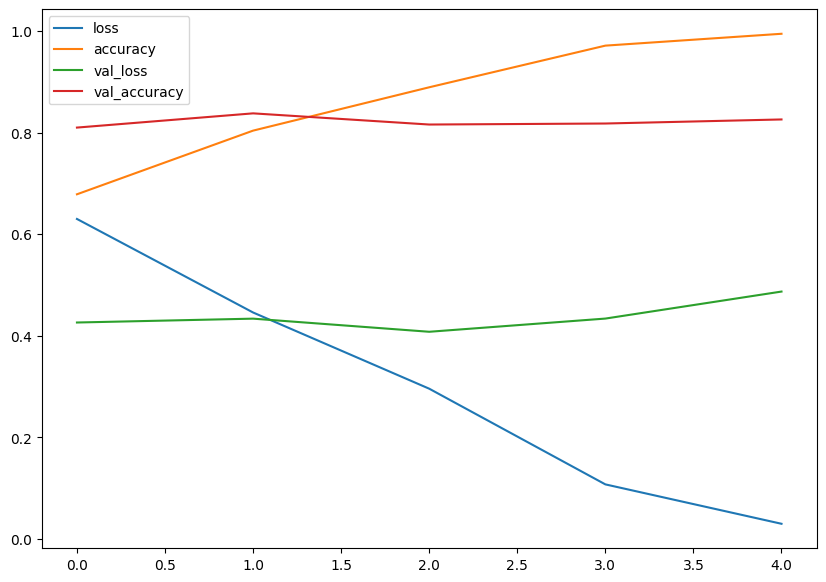

In [39]:
# Let's plot training curves
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()

In [40]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  ''' 
  Returns seperate loss curves for training and validation 
  '''

  # loss and validation loss
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # accuracy and validation accuracy
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['val_accuracy'])) # how many epoch 

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

**Note:** When a model's validation loss starts to increase, it's likley that the model is **overfitting** the training dataset. This means, model is learning train dataset too well and model's abilitiy to generalize to unseen data will be diminished. Actually, overfitting is like memorizing the data, not learning. 

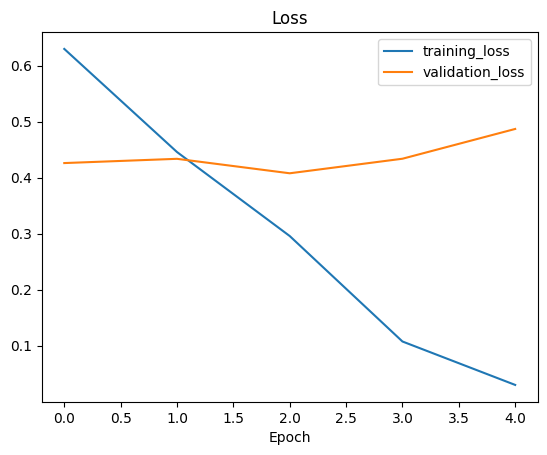

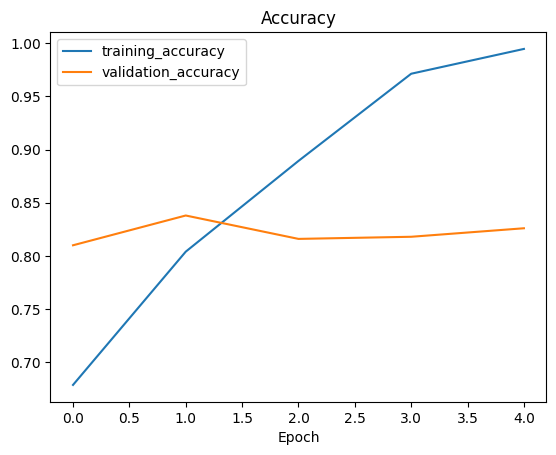

In [41]:
# Let's plot seperately
plot_loss_curves(history_4)

Ideally, the two loss curves should be similiar to each other. If there is a large difference between them, it means overfitting. 

### 6. Adjust the model parameter

Fitting machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of convolution layers
* Increse the number of convolution filters
* Add another dense layers to the output of flattened layer

Ways to reduce overfitting:

* Add data augmentation
* Add regularization layers such as MaxPool
* Add more data

Reducing overfitting also known as **regularization**.

In [42]:
# Create the model (this is going to our new baseline)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [43]:
# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 0.6204 - accuracy: 0.6560 - val_loss: 0.4605 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4402 - accuracy: 0.7947 - val_loss: 0.3990 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.4215 - accuracy: 0.8067 - val_loss: 0.3471 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3914 - accuracy: 0.8387 - val_loss: 0.3262 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3624 - accuracy: 0.8473 - val_loss: 0.2965 - val_accuracy: 0.8840


In [45]:
# Get a sumamry of model_5
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [46]:
# Let's look before model summary and compare them (model_4)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


**Note:** Total parameters of model_4 is 477,341 and 8,861 for model_5. That's the power of MaxPooling layers...

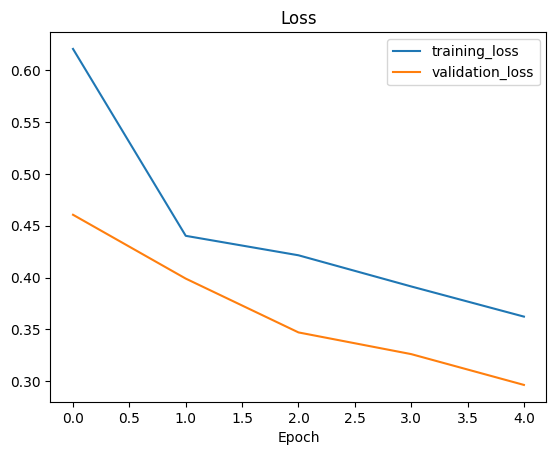

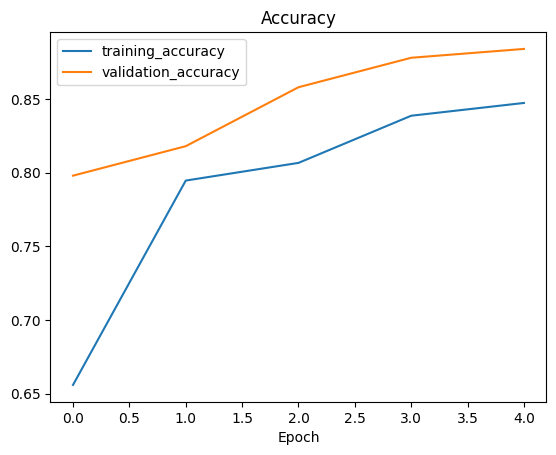

In [47]:
# Plot loss curves of model_5
plot_loss_curves(history_5)

As you see above, train and validation losses looks similiar and this is better than before loss curves.

### Opening our bag of tricks and finding data augmentation

In [62]:
# Create ImageDataGenerator traning instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # how much do you want to zoom an image?
                                             width_shift_range=0.2, # how much do you want to move an image in x-axis?
                                             height_shift_range=0.3, # how much do you want to move an image in y-axis?
                                             horizontal_flip=True) # Do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is a technique commonly used in machine learning and deep learning to increase the size and diversity of a training dataset by applying various transformations or modifications to the existing data. It involves creating new samples by making slight modifications to the original data, such as rotations, translations, flips, scaling, cropping, or introducing random noise.

Common data augmentation parameters:

1. Rotation Range: Specifies the range of random rotations to apply to the images. For example, a rotation range of 20 degrees means that the images can be rotated randomly between -20 and +20 degrees.

2. Width Shift Range: Determines the range of random horizontal shifts to apply to the images. It is typically specified as a fraction of the total image width.

3. Height Shift Range: Sets the range of random vertical shifts to apply to the images. It is usually specified as a fraction of the total image height.

4. Shear Range: Defines the range of random shear transformations to apply to the images. Shear transformations tilt or slant the image in a specified direction.

5. Zoom Range: Specifies the range of random zooming to apply to the images. Zooming can be either zooming in (enlarging) or zooming out (shrinking) the images.

5. Horizontal Flip: Determines whether to randomly flip the images horizontally or not. Horizontal flipping can be useful when there is no inherent orientation or directionality in the data.

Let's see the effect of data augmentation.

In [63]:
# Create data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # For demonstration purpose only

# Create non-augmented data
print('\nTraining data without data augmentation:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('\nTest data without data augmentation:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')                  

Augmented training data:
Found 1500 images belonging to 2 classes.

Training data without data augmentation:
Found 1500 images belonging to 2 classes.

Test data without data augmentation:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation usally uses on the training dataset.

Let's visualize some augmented data...

In [64]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels aren't augmented. Only images are augmented..

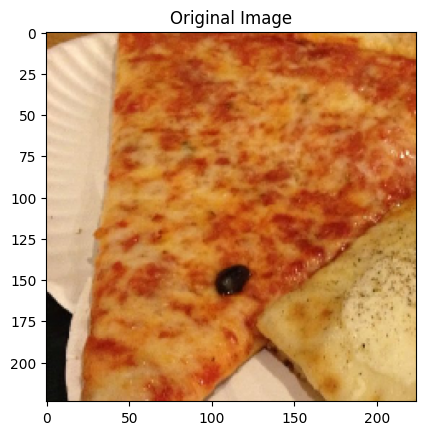

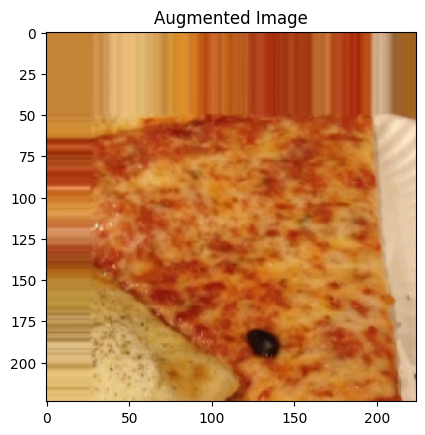

In [66]:
# Let's plot the original image and augmented image
random_number = random.randint(0, 32) # batch size is 32
plt.imshow(images[random_number])
plt.title('Original Image')
plt.show()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.show()

We have seen the augmented training data looks like, and now, let's create a model with augmented data and see how it learns..

In [67]:
# Create a model with augmented data (same structure as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting the model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 484ms/step - loss: 0.7119 - accuracy: 0.5947 - val_loss: 0.7333 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7684 - accuracy: 0.5180 - val_loss: 0.6846 - val_accuracy: 0.5560
Epoch 3/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6881 - accuracy: 0.5633 - val_loss: 0.6682 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6900 - accuracy: 0.5587 - val_loss: 0.6755 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6856 - accuracy: 0.5987 - val_loss: 0.6633 - val_accuracy: 0.7200


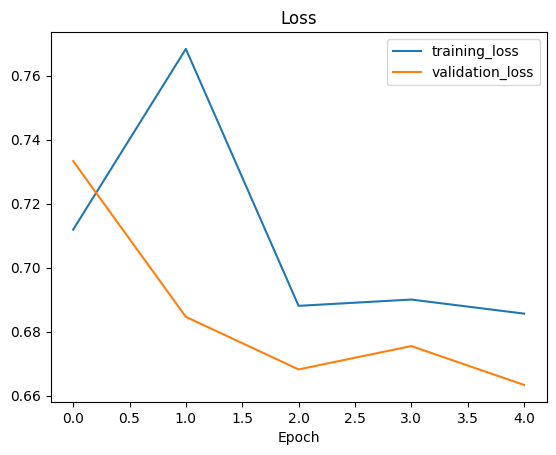

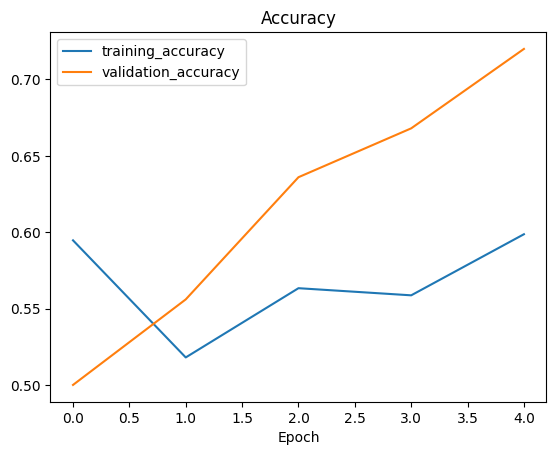

In [68]:
# Check the training curves of model_6
plot_loss_curves(history_6)

Let's suffle our augmented training data and train another model and see what happens. 

In [71]:
# Import data and augmented it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode='binary',
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [72]:
# Create a model (same structure as model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting on augmented and shuffled data 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 491ms/step - loss: 0.6847 - accuracy: 0.5600 - val_loss: 0.5863 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6121 - accuracy: 0.6713 - val_loss: 0.4802 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 23s 486ms/step - loss: 0.5257 - accuracy: 0.7400 - val_loss: 0.3894 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4957 - accuracy: 0.7680 - val_loss: 0.3941 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.4882 - accuracy: 0.7640 - val_loss: 0.3572 - val_accuracy: 0.8320


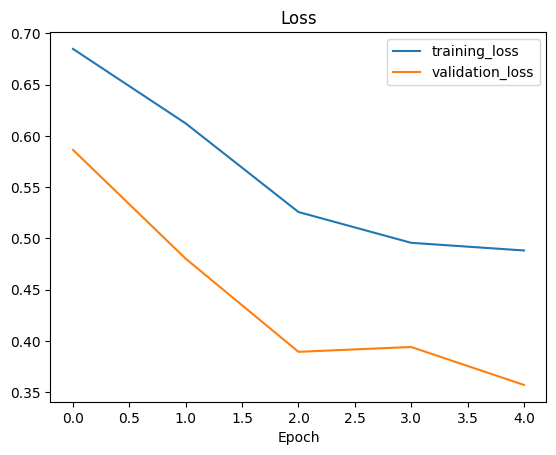

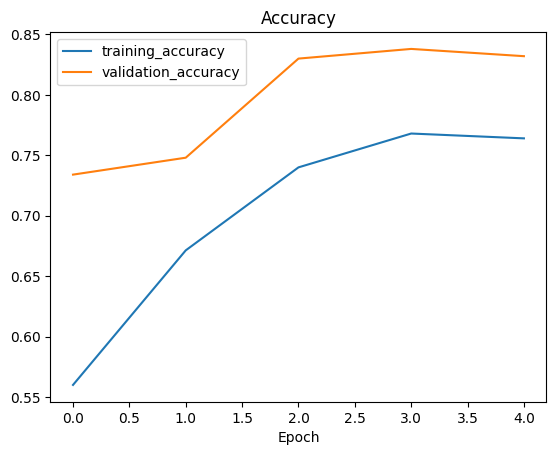

In [75]:
# Plot loss curves of model_7
plot_loss_curves(history_7)

If the data is presented in a specific order, the model may learn to be biased towards certain patterns or examples encountered early in the training process. Shuffling the data helps to break any inherent order or bias in the dataset, ensuring that the model receives a more diverse and representative sample of the data.

### 7. Repeat until satisfied

There are a few things to improve our model:

* Increase the number of layers (add more Conv2D and MaxPool)
* Increase the number of filters in each convolution layer (e.g. from 10 to 32 or 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case
 


## Making a precition with our trained model on our custom data

In [78]:
# Classes we're working on
print(class_names)

['pizza' 'steak']


--2023-06-01 12:23:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.4’

03-steak.jpeg.4     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-06-01 12:23:19 (57.7 MB/s) - ‘03-steak.jpeg.4’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

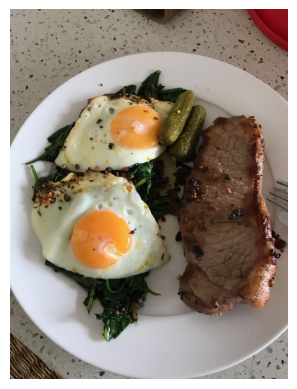

In [83]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [84]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

When you a train a neural network and you want to make a prediction with your custom data or new data, it is important that your custom or new data is preprocessed as the data your model was trained on. 

In [89]:
# Create a function to import and image and resize it to be able tobe used our model
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image from filename, turns it into a tensor and reshapes it as your model want
  '''
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [93]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg', img_shape=224)
steak.shape

TensorShape([224, 224, 3])

In [96]:
# Make a prediction
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 22ms/step


array([[0.9073579]], dtype=float32)

As you see above, our output is a prediction probability. Let's round it.

In [95]:
# Remind class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [101]:
# Round prediction probability and see the prediction class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [117]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Import and image located at filename, makes a prediction and plot it.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Get the predicted class
  pred = model.predict(tf.expand_dims(img, axis=0), verbose=0)
  pred_class = class_names[int(tf.round(pred))]

  # Plot image and predicted class
  img = mpimg.imread(filename)
  plt.imshow(img)
  plt.title(f'Model prediction: {pred_class}')
  plt.axis(False) 
  plt.show()


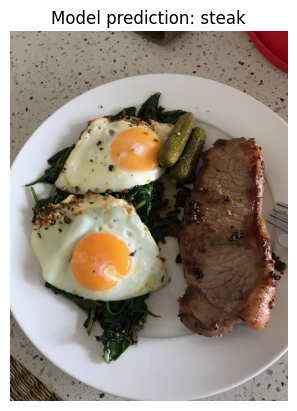

In [118]:
# Test the model with custom image
pred_and_plot(model_7, '03-steak.jpeg')

Yes.. Model works!! Let's try another custom photo...

In [119]:
# Download the image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-06-01 13:07:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-06-01 13:07:13 (64.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



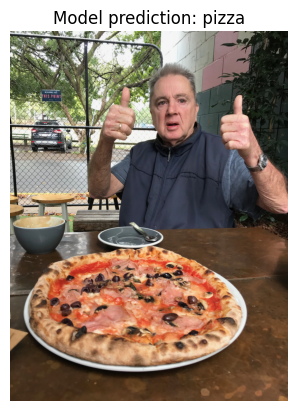

In [120]:
# Test the model with second one
pred_and_plot(model_7, '03-pizza-dad.jpeg')

Let's try for the last time :) 

In [121]:
# Download the image
!wget https://hips.hearstapps.com/esquire/assets/17/11/1489773199-breaking-bad-pizza.png

--2023-06-01 13:11:39--  https://hips.hearstapps.com/esquire/assets/17/11/1489773199-breaking-bad-pizza.png
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021391 (997K) [image/png]
Saving to: ‘1489773199-breaking-bad-pizza.png’

1489773199-breaking 100%[===================>] 997.45K  --.-KB/s    in 0.03s   

2023-06-01 13:11:39 (29.7 MB/s) - ‘1489773199-breaking-bad-pizza.png’ saved [1021391/1021391]



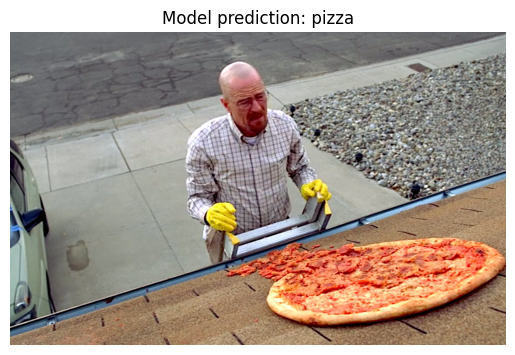

In [122]:
# Test the model for the first time
pred_and_plot(model_7, '1489773199-breaking-bad-pizza.png')